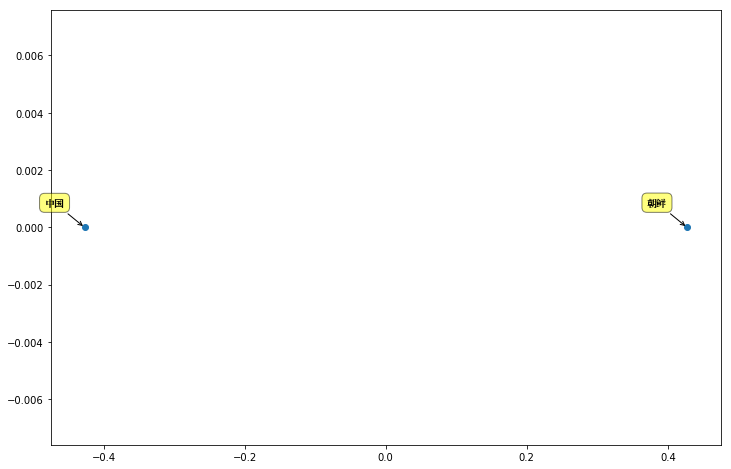

In [6]:
# -*- coding: utf-8 -*-
"""
given a word and visualize near words
original source code is https://github.com/nishio/mycorpus/blob/master/vis.py
"""
from __future__ import print_function
from __future__ import division

import sys

reload(sys)
sys.setdefaultencoding("utf-8")

import word2vec_boostpython as w2v
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn.decomposition import PCA

class visWord2Vec:
    def __init__(self, filename = 'vectors.bin'):
        font = matplotlib.font_manager.FontProperties(fname='/Library/Fonts/Songti.ttc')
        FONT_SIZE = 10
        self.TEXT_KW = dict(fontsize=FONT_SIZE, fontweight='bold', fontproperties=font)

        print('loading')
        self.data = w2v.load(filename)
        print('loaded')

    def plot(self, query, nbest = 15):
        if ', ' not in query:
            words = [query] + w2v.search(self.data, query)[:nbest]
        else:
            words = query.split(', ')
            print(', '.join(words))
        mat = w2v.get_vectors(self.data)
        word_indexes = [w2v.get_word_index(self.data, w) for w in words]
        if word_indexes == [-1]:
            print('not in vocabulary')
            return

        # do PCA
        X = mat[word_indexes]
        pca = PCA(n_components=2)
        pca.fit(X)
        print(pca.explained_variance_ratio_)
        X = pca.transform(X)
        xs = X[:, 0]
        ys = X[:, 1]

        # draw
        plt.figure(figsize=(12,8))
        plt.scatter(xs, ys, marker = 'o')
        for i, w in enumerate(words):
            plt.annotate(
                w.decode('utf-8', errors='ignore'),
                xy = (xs[i], ys[i]), xytext = (-20, 20),
                textcoords = 'offset points', ha = 'right', va = 'bottom',
                bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
                arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'),
                **self.TEXT_KW)

        plt.show()
        
vis = visWord2Vec(filename="/Users/hain/tmp/w2v_models/w2v_v2.bin.18")
vis.plot('中国, 朝鲜')

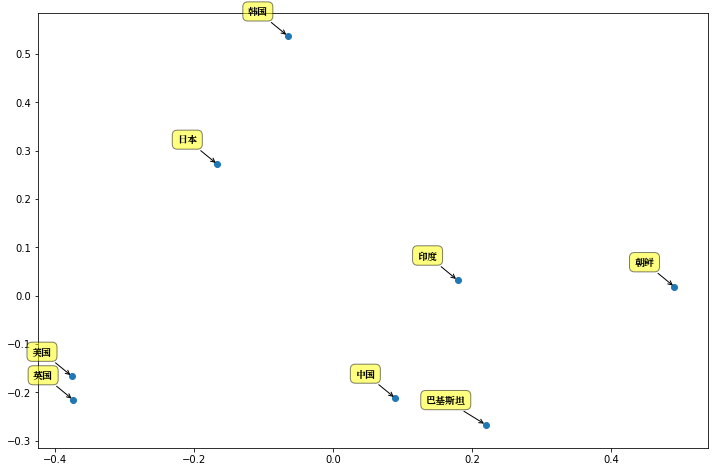

In [7]:
vis = visWord2Vec(filename="/Users/hain/tmp/w2v_models/w2v_v2.bin.18")
vis.plot('中国, 朝鲜, 韩国, 日本, 美国, 英国, 巴基斯坦, 印度')